In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# GEO EM FILE

In [3]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]

# time, LAT, LON ncfiles

In [4]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [5]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

#qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')

#pblh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)
# tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp_zcoords.nc')

# ph_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PH' + '_ens_mean_vinterp_zcoords.nc')
# phb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PHB' + '_ens_mean_vinterp_zcoords.nc')

u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
#w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

# qvapor_ncfile.set_auto_mask(False)
# tk_ncfile.set_auto_mask(False)
# ph_ncfile.set_auto_mask(False)
# phb_ncfile.set_auto_mask(False)
u_ncfile.set_auto_mask(False)
v_ncfile.set_auto_mask(False)
#w_ncfile.set_auto_mask(False)

In [6]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

z = u_ncfile.variables['z'][:]
#qvapor_400 = qvapor_ncfile.variables['QVAPOR'][:]
#tk_400 = tk_ncfile.variables['TK'][:]
#ph_400 = ph_ncfile.variables['PH'][:]
#phb_400 = phb_ncfile.variables['PHB'][:]

#pblh_400 = pblh_ncfile.variables['PBLH'][:]
u_400 = u_ncfile.variables['U'][:]
v_400 = v_ncfile.variables['V'][:]
#w_400 = w_ncfile.variables['W'][:]

In [7]:
#qvapor_400[qvapor_400>1e10]=numpy.nan
#tk_400[tk_400>1e10]=numpy.nan
#ph_400[ph_400>1e10]=numpy.nan
#phb_400[phb_400>1e10]=numpy.nan
u_400[u_400>1e10]=numpy.nan
v_400[v_400>1e10]=numpy.nan
#w_400[w_400>1e10]=numpy.nan

# import FMAASO 1000 data

In [8]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')

pblh_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PBLH' + filename_suffix)
# tk_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'TK' + '_ens_mean_vinterp_zcoords.nc')
# ph_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PH' + '_ens_mean_vinterp_zcoords.nc')
# phb_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'PHB' + '_ens_mean_vinterp_zcoords.nc')

u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
# w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

#qvapor_ncfile.set_auto_mask(False)
#tk_ncfile.set_auto_mask(False)
#ph_ncfile.set_auto_mask(False)
#phb_ncfile.set_auto_mask(False)
u_ncfile.se`t_auto_mask(False)
v_ncfile.set_auto_mask(False)
#w_ncfile.set_auto_mask(False)

SyntaxError: invalid syntax (<ipython-input-8-8cb4ccef7f0e>, line 25)

In [ ]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

#qvapor_1000 = qvapor_ncfile.variables['QVAPOR'][:]
# tk_1000 = tk_ncfile.variables['TK'][:]

pblh_1000 = pblh_ncfile.variables['PBLH'][:]
# ph_1000 = ph_ncfile.variables['PH'][:]
# phb_1000 = phb_ncfile.variables['PHB'][:]

u_1000 = u_ncfile.variables['U'][:]
v_1000 = v_ncfile.variables['V'][:]
#w_1000 = w_ncfile.variables['W'][:]

In [ ]:
#qvapor_1000[qvapor_1000>1e10]=numpy.nan
# tk_1000[tk_1000>1e10]=numpy.nan
# ph_1000[ph_1000>1e10]=numpy.nan
# phb_1000[phb_1000>1e10]=numpy.nan
u_1000[u_1000>1e10] = numpy.nan
v_1000[v_1000>1e10] = numpy.nan
#w_1000[w_1000>1e10] = numpy.nan

In [ ]:
#ph_tot_400 = ph_400+phb_400
#ph_tot_1000 = ph_400+phb_1000

# get time stamps

In [ ]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [ ]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

# constants

In [ ]:
L_v = 2264705.0 # J/kg
c_p = 1005.7 # J/kgK
g = 9.80665 # m/s2

# lat indices subset

In [ ]:
lat_hi = 10.
lat_lo = -10.
# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)

# calculate MSE on pressure levels

# save mse as npy file

# open mse from npy files

In [16]:
mse_400 = numpy.load('DATA_mse_400.npy')
mse_1000 = numpy.load('DATA_mse_1000.npy')

In [16]:
mse_diffs = mse_1000 - mse_400

In [17]:
#mse_diffs_lat_subset = mse_diffs_landmask[:,:,lat_indices[:,0],:]
#mse_400_lat_subset = mse_400_landmask[:,:,lat_indices[:,0],:]
#mse_1000_lat_subset = mse_1000_landmask[:,:,lat_indices[:,0],:]

mse_diffs_lat_subset = mse_diffs[:,:,lat_indices[:,0],:]
mse_400_lat_subset = mse_400[:,:,lat_indices[:,0],:]
mse_1000_lat_subset = mse_1000[:,:,lat_indices[:,0],:]

In [18]:
mse_diffs_lat_mean = numpy.nanmean(mse_diffs_lat_subset, axis=2)
mse_400_lat_mean = numpy.nanmean(mse_400_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# horizontal MSE advection

In [9]:
u_400_midpoints = 0.5*(u_400[:,:,0:-1,0:-1] + u_400[:,:,1:,1:])

In [20]:
u_1000_midpoints = 0.5*(u_1000[:,:,0:-1,0:-1] + u_1000[:,:,1:,1:])

In [21]:
v_400_midpoints = 0.5*(v_400[:,:,0:-1,0:-1] + v_400[:,:,1:,1:])

In [22]:
v_1000_midpoints = 0.5*(v_1000[:,:,0:-1,0:-1] + v_1000[:,:,1:,1:])

In [ ]:
delta_mse_temporary = numpy.diff(mse_400, axis=3)
delta_mse_400_xlong_vertices = 0.5*(delta_mse_temporary[:,:,0:-1,:]+delta_mse_temporary[:,:,1:,:])

In [24]:
delta_mse_temporary = numpy.diff(mse_400, axis=2)
delta_mse_400_xlat_vertices = 0.5*(delta_mse_temporary[:,:,:,0:-1]+delta_mse_temporary[:,:,:,1:])

In [25]:
delta_mse_temporary = numpy.diff(mse_1000, axis=3)
delta_mse_1000_xlong_vertices = 0.5*(delta_mse_temporary[:,:,0:-1,:]+delta_mse_temporary[:,:,1:,:])

In [26]:
delta_mse_temporary = numpy.diff(mse_1000, axis=2)
delta_mse_1000_xlat_vertices = 0.5*(delta_mse_temporary[:,:,:,0:-1]+delta_mse_temporary[:,:,:,1:])

In [27]:
xlong_vertices = 0.5*(xlong[0:-1,0:-1]+xlong[1:,1:])
xlat_vertices = 0.5*(xlat[0:-1,0:-1]+xlat[1:,1:])

In [28]:
xlong_centered_edges = 0.5*(xlong[0:-1,:]+xlong[1:,:])
xlat_for_xlong_centered_edges = 0.5*(xlat[0:-1,:]+xlat[1:,:])
xlat_centered_edges = 0.5*(xlat[:,0:-1]+xlat[:,1:])
xlong_for_xlat_centered_edges = 0.5*(xlong[:,0:-1]+xlong[:,1:])

In [30]:
numpy.save('xlong_vertices.npy',xlong_vertices)
numpy.save('xlat_vertices.npy',xlat_vertices)

In [31]:
import geopy.distance

distances_xlong = numpy.zeros((xlong.shape[0]-1,xlong.shape[1]-1))
for i in range(distances_xlong.shape[0]):
    for j in range(distances_xlong.shape[1]):
        point1 = (xlat_for_xlong_centered_edges[i,j],xlong_centered_edges[i,j])
        point2 = (xlat_for_xlong_centered_edges[i,j+1],xlong_centered_edges[i,j+1])
        distances_xlong[i,j] = geopy.distance.vincenty(point1,point2).m

distances_xlat = numpy.zeros((xlat.shape[0]-1,xlat.shape[1]-1))
for i in range(distances_xlat.shape[0]):
    for j in range(distances_xlat.shape[1]):
        point1 = (xlat_centered_edges[i,j],xlong_for_xlat_centered_edges[i,j])
        point2 = (xlat_centered_edges[i+1,j],xlong_for_xlat_centered_edges[i+1,j])
        distances_xlat[i,j] = geopy.distance.vincenty(point1,point2).m

In [32]:
mse_400_advection_u = u_400_midpoints*(delta_mse_400_xlong_vertices/distances_xlong)
mse_400_advection_v = v_400_midpoints*(delta_mse_400_xlat_vertices/distances_xlat)
mse_1000_advection_u = u_1000_midpoints*(delta_mse_1000_xlong_vertices/distances_xlong)
mse_1000_advection_v = v_1000_midpoints*(delta_mse_1000_xlat_vertices/distances_xlat)

# calculate MSE advection terms

In [20]:
mse_400_adv_total = numpy.load('mse_400_adv_total.npy')
mse_1000_adv_total = numpy.load('mse_1000_adv_total.npy')

# qvapor diffs and lat means

In [47]:
qvapor_diffs = qvapor_1000 - qvapor_400

NameError: name 'qvapor_1000' is not defined

In [23]:
qvapor_diffs_lat_subset = qvapor_diffs[:,:,lat_indices[:,0],:]
qvapor_400_lat_subset = qvapor_400[:,:,lat_indices[:,0],:]

In [24]:
qvapor_diffs_lat_mean = numpy.nanmean(qvapor_diffs_lat_subset, axis=2)
qvapor_400_lat_mean = numpy.nanmean(qvapor_400_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


# mse advection diffs and lat means

In [39]:
mse_adv_total_diffs = mse_1000_adv_total - mse_400_adv_total

In [41]:
lat_indices_vertices = (xlat_midpoints<=lat_hi)&(xlat_midpoints>=lat_lo)

In [43]:
mse_adv_total_diffs_lat_subset = mse_adv_total_diffs[:,:,lat_indices_vertices[:,0],:]
mse_400_adv_total_lat_subset = mse_400_adv_total[:,:,lat_indices_vertices[:,0],:]

In [45]:
mse_adv_total_diffs_mean = numpy.nanmean(mse_adv_total_diffs_lat_subset, axis=2)
mse_400_adv_total_mean = numpy.nanmean(mse_400_adv_total_lat_subset, axis=2)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [54]:
xlat.shape

(179, 289)

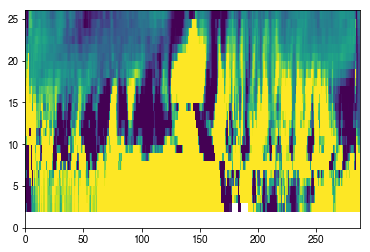

In [90]:
mp.pcolormesh(mse_400_adv_total_mean[101,:,:],vmin=-0.01,vmax=0.01)

# PBLH differences

In [28]:
pblh_diffs = pblh_1000 - pblh_400

# PBLH lat means

In [29]:
pblh_diffs_landmask = numpy.copy(pblh_diffs)
pblh_diffs_landmask[:,landmask==0]=numpy.nan
pblh_diffs_landmask[pblh_diffs_landmask==9.96921e36]=numpy.nan

In [30]:
pblh_400_landmask = numpy.copy(pblh_400)
pblh_400_landmask[:,landmask==0]=numpy.nan
#pblh_400_landmask[pblh_400_landmask==9.96921e36]=numpy.nan

In [31]:
pblh_1000_landmask = numpy.copy(pblh_1000)
pblh_1000_landmask[:,landmask==0]=numpy.nan
#pblh_1000_landmask[pblh_1000_landmask==9.96921e36]=numpy.nan

In [32]:
pblh_diffs_lat_subset = pblh_diffs_landmask[:,lat_indices[:,0],:]
pblh_400_lat_subset = pblh_400_landmask[:,lat_indices[:,0],:]
pblh_1000_lat_subset = pblh_1000_landmask[:,lat_indices[:,0],:]

In [33]:
pblh_diffs_lat_mean = numpy.nanmean(pblh_diffs_lat_subset, axis=1)
pblh_400_lat_mean = numpy.nanmean(pblh_400_lat_subset, axis=1)
pblh_1000_lat_mean = numpy.nanmean(pblh_1000_lat_subset, axis=1)

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


# 3 hourly means of MSE and QVAPOR lat means

# qvapor

In [34]:
qvapor_400_t00mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qvapor_400_t03mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qvapor_400_t06mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qvapor_400_t09mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qvapor_400_t12mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qvapor_400_t15mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qvapor_400_t18mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qvapor_400_t21mean = numpy.nanmean(qvapor_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qvapor_400_array = numpy.array([qvapor_400_t00mean, qvapor_400_t03mean, qvapor_400_t06mean, qvapor_400_t09mean, qvapor_400_t12mean, qvapor_400_t15mean, qvapor_400_t18mean, qvapor_400_t21mean])


/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/

In [35]:
# calculate 3 hourly means for 400
qvapor_diffs_t00mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
qvapor_diffs_t03mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
qvapor_diffs_t06mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
qvapor_diffs_t09mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
qvapor_diffs_t12mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
qvapor_diffs_t15mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
qvapor_diffs_t18mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
qvapor_diffs_t21mean = numpy.nanmean(qvapor_diffs_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

qvapor_diffs_array = numpy.array([qvapor_diffs_t00mean, qvapor_diffs_t03mean, qvapor_diffs_t06mean, qvapor_diffs_t09mean, qvapor_diffs_t12mean, qvapor_diffs_t15mean, qvapor_diffs_t18mean, qvapor_diffs_t21mean])

# monthly mean
#qvapor_diffs_time_mean = numpy.mean(qvapor_1000[skip_time:,:,:] - qvapor_diffs[skip_time:,:,:], axis=0)
#qvapor_diffs_time_mean_landmask = numpy.copy(qvapor_diffs_time_mean)
#qvapor_diffs_time_mean_landmask[landmask==0] = numpy.nan

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9

# PBLH means

In [36]:
# calculate 3 hourly means for 400
pblh_400_t00mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_00,:], axis=0)
pblh_400_t03mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_03,:], axis=0)
pblh_400_t06mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_06,:], axis=0)
pblh_400_t09mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_09,:], axis=0)
pblh_400_t12mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_12,:], axis=0)
pblh_400_t15mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_15,:], axis=0)
pblh_400_t18mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_18,:], axis=0)
pblh_400_t21mean = numpy.mean(pblh_400_lat_mean[skip_time:][times_21,:], axis=0)

pblh_1000_t00mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_00,:], axis=0)
pblh_1000_t03mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_03,:], axis=0)
pblh_1000_t06mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_06,:], axis=0)
pblh_1000_t09mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_09,:], axis=0)
pblh_1000_t12mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_12,:], axis=0)
pblh_1000_t15mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_15,:], axis=0)
pblh_1000_t18mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_18,:], axis=0)
pblh_1000_t21mean = numpy.mean(pblh_1000_lat_mean[skip_time:][times_21,:], axis=0)

pblh_400_array = numpy.array([pblh_400_t00mean, pblh_400_t03mean, pblh_400_t06mean, pblh_400_t09mean, pblh_400_t12mean, pblh_400_t15mean, pblh_400_t18mean, pblh_400_t21mean])
pblh_1000_array = numpy.array([pblh_1000_t00mean, pblh_1000_t03mean, pblh_1000_t06mean, pblh_1000_t09mean, pblh_1000_t12mean, pblh_1000_t15mean, pblh_1000_t18mean, pblh_1000_t21mean])

# monthly mean
#pblh_diffs_time_mean = numpy.mean(pblh_1000[skip_time:,:,:] - pblh_400[skip_time:,:,:], axis=0)
#pblh_diffs_time_mean_landmask = numpy.copy(pblh_diffs_time_mean)
#pblh_diffs_time_mean_landmask[landmask==0] = numpy.nan

# HGT_M subset

In [37]:
round(HGT_M.shape[0]/2)

90

In [38]:
HGT_M_lat_subset = HGT_M[lat_indices[:,0],:]
HGT_M_lat_subset_maxvals = numpy.max(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_equator = HGT_M[round(HGT_M_lat_subset.shape[0]/2),:]
HGT_M_lat_subset_minvals = numpy.min(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_mean = numpy.mean(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_median = numpy.median(HGT_M_lat_subset, axis=0)

# calculate mse advection lat means

In [ ]:
# calculate 3 hourly means for 400
mse_adv_tot_400_t00mean = numpy.nanmean(mse_adv_tot_400_lat_mean[skip_time:,:,:][times_00,:,:], axis=0)
mse_adv_tot_400_t03mean = numpy.nanmean(mse_adv_tot_400_lat_mean[skip_time:,:,:][times_03,:,:], axis=0)
mse_adv_tot_400_t06mean = numpy.nanmean(mse_adv_tot_400_lat_mean[skip_time:,:,:][times_06,:,:], axis=0)
mse_adv_tot_400_t09mean = numpy.nanmean(mse_adv_tot_400_lat_mean[skip_time:,:,:][times_09,:,:], axis=0)
mse_adv_tot_400_t12mean = numpy.nanmean(mse_adv_tot_400_lat_mean[skip_time:,:,:][times_12,:,:], axis=0)
mse_adv_tot_400_t15mean = numpy.nanmean(mse_adv_tot_400_lat_mean[skip_time:,:,:][times_15,:,:], axis=0)
mse_adv_tot_400_t18mean = numpy.nanmean(mse_adv_tot_400_lat_mean[skip_time:,:,:][times_18,:,:], axis=0)
mse_adv_tot_400_t21mean = numpy.nanmean(mse_adv_tot_400_lat_mean[skip_time:,:,:][times_21,:,:], axis=0)

mse_adv_tot_400_array = numpy.array([mse_adv_tot_400_t00mean, mse_adv_tot_400_t03mean, mse_adv_tot_400_t06mean, mse_adv_tot_400_t09mean, mse_adv_tot_400_t12mean, mse_adv_tot_400_t15mean, mse_adv_tot_400_t18mean, mse_adv_tot_400_t21mean])

# monthly mean
#mse_adv_tot_400_time_mean = numpy.mean(qvapor_1000[skip_time:,:,:] - mse_adv_tot_400[skip_time:,:,:], axis=0)
#mse_adv_tot_400_time_mean_landmask = numpy.copy(mse_adv_tot_400_time_mean)
#mse_adv_tot_400_time_mean_landmask[landmask==0] = numpy.nan

# SET UP PLOT

# background mse

In [ ]:
minval=0.1 # for inferno:  0.18
maxval=0.75 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('Blues_r')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(\
                                                                    n=full_cmap.name, \
                                                                    a=minval, b=maxval), \
                                                                    full_cmap(numpy.linspace(minval, maxval, n)))

In [ ]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(325,346,2.5)
levels_qvapor = numpy.arange(7.5,17.6,2.5)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,mse_400_array[t]/1000.,\
                               levels=levels,\
                               cmap='Reds',extend='max')
    #ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='red',ls='--', label='ABLH high CO$_2$')
    
    contour_lines = ax.contour(xlong[0,:]+360.,z,qvapor_400_array[t]*1000.,\
                               levels=levels_qvapor,\
                               cmap=cmap_partial, extend='both')

    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True,zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()

ax_height = top_pos.y1-bottom_pos.y0

cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(325,346,5))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines, cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('spec. hum. (g kg$^{\,-1}$)', fontsize=fontsize)
#cbar_lines_ax.get_children().set_linewidths([2]*7)
#cbar_lines_ax.text(s='water\nvapor', x=0, y=1.05, ha='left', va='bottom', \
#                  transform=cbar_lines_ax.transAxes, fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')


#cbar_qvapor = mp.colorbar(contour_lines)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5, framealpha=0.666)

fig.savefig('mse_400_cross_sections_zcoords.png', dpi=600, bbox_inches='tight', transparent=True)

# background mse with q in energy units

In [ ]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(325,346,2.5)
levels_qvapor = numpy.arange(5,41,5) # kJ/kg

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,mse_400_array[t]/1000.,\
                               levels=levels,\
                               cmap='Reds',extend='max')
    #ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='red',ls='--', label='ABLH high CO$_2$')
    
    contour_lines = ax.contour(xlong[0,:]+360.,z,qvapor_400_array[t]*L_v/1000.,\
                               levels=levels_qvapor,\
                               cmap=cmap_partial, extend='both')

    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True,zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()

ax_height = top_pos.y1-bottom_pos.y0

cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(325,346,5))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines, cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar_lines_ax.get_children().set_linewidths([2]*7)
#cbar_lines_ax.text(s='water\nvapor', x=0, y=1.05, ha='left', va='bottom', \
#                  transform=cbar_lines_ax.transAxes, fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')


#cbar_qvapor = mp.colorbar(contour_lines)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5, framealpha=0.666)

fig.savefig('mse_400_cross_sections_zcoords_energy_units.png', dpi=600, bbox_inches='tight', transparent=True)

In [ ]:
z[[2,6,7,8,9,10,11,12,13]]

In [ ]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.25,1.26,0.25)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

#every_nth_z=3
z_indices=[2,6,7,8,9,10,11,12,13]
every_nth_lon=10
quiver_scale = 0.2 # 0.05 for 850-600, 0.1 for below 850
quiver_shaft_width = 1.#.75
quiver_key_scale = 5
quiver_color = '0.1'
quiver_head_length = 3
quiver_head_axis_length = quiver_head_length

# quiver_plot1 = ax2.quiver(XLONG_M[::every_nth_lat,::every_nth_lon], \
#                         XLAT_M[::every_nth_lat,::every_nth_lon], \
#                         uu850_mean_FMAASO[::every_nth_lat,::every_nth_lon], \
#                         vv850_mean_FMAASO[::every_nth_lat,::every_nth_lon], \
#                         units='xy', scale=quiver_scale, width=quiver_shaft_width, \
#                         color=quiver_color, headlength=quiver_head_length, \
#                         headaxislength=quiver_head_axis_length, \
#                         zorder=2)
# quiver_key = ax2.quiverkey(quiver_plot1, X=1.0, Y=1.06, labelpos='E', label='', \
#                                   U=quiver_key_scale, coordinates='axes')

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               mse_diffs_array[t]/1000.,\
                               levels=levels,\
                               cmap='PuOr_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
    ax.quiver(xlong[0,:][::every_nth_lon]+360.,z[z_indices],\
              u_diffs_array[t][z_indices,::every_nth_lon],\
              w_diffs_array[t][z_indices,::every_nth_lon]*1000.,\
              units='xy', scale=quiver_scale, \
              color=quiver_color, zorder=3)
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array[t]*L_v/1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array[t]*L_v/1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.8,0.81,0.2))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('mse_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

In [ ]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.5,1.51,0.25)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               tk_diffs_array[t]*c_p/1000.,\
                               levels=levels,\
                               cmap='RdGy_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
#     if t in [6,7]:
#         contour_lines = ax.contour(xlong[0,:]+360.,z,\
#                                    qvapor_diffs_array[t]*L_v/1000.,\
#                                    levels=levels_qvapor,\
#                                    linewidths=1,\
#                                    colors=colors_qvapor,\
#                                    linestyles=linestyles_qvapor, extend='both')
#         contour_lines_list.append(contour_lines)

#     else:
#         for line in range(levels_qvapor.__len__()):        
#             ax.contour(xlong[0,:]+360.,z,\
#                                        qvapor_diffs_array[t]*L_v/1000.,\
#                                        levels=levels_qvapor[line],\
#                                        linewidths=1,\
#                                        colors=colors_qvapor[line],\
#                                        linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ temperature (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-1,1.1,0.2))

# cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
# cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
# cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
# cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
# cbar_lines.outline.set_visible(False)
# cbar_lines_ax.tick_params(axis='y', which='both', right='off')
# cbar_lines_ax.get_children()[0].set_linewidths(2)
# cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
# cbar_lines_ax.get_children()[1].set_facecolor('None')
# cbar_lines_ax.get_children()[2].set_facecolor('None')
# cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('temp_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

In [ ]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.5,1.51,0.25)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               qvapor_diffs_array[t]*L_v/1000.,\
                               levels=levels,\
                               cmap='RdBu',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
#     if t in [6,7]:
#         contour_lines = ax.contour(xlong[0,:]+360.,z,\
#                                    qvapor_diffs_array[t]*L_v/1000.,\
#                                    levels=levels_qvapor,\
#                                    linewidths=1,\
#                                    colors=colors_qvapor,\
#                                    linestyles=linestyles_qvapor, extend='both')
#         contour_lines_list.append(contour_lines)

#     else:
#         for line in range(levels_qvapor.__len__()):        
#             ax.contour(xlong[0,:]+360.,z,\
#                                        qvapor_diffs_array[t]*L_v/1000.,\
#                                        levels=levels_qvapor[line],\
#                                        linewidths=1,\
#                                        colors=colors_qvapor[line],\
#                                        linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ spec. humidity (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-1,1.1,0.2))

# cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
# cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
# cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
# cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
# cbar_lines.outline.set_visible(False)
# cbar_lines_ax.tick_params(axis='y', which='both', right='off')
# cbar_lines_ax.get_children()[0].set_linewidths(2)
# cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
# cbar_lines_ax.get_children()[1].set_facecolor('None')
# cbar_lines_ax.get_children()[2].set_facecolor('None')
# cbar_lines_ax.set_ytickllabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('qvapor_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

In [ ]:
#cf=mp.contourf(ph_tot_diffs_array[-1,:,:]/1000.,levels=numpy.arange(-0.03,0.031,0.005), cmap='RdBu_r')
cf=mp.contourf(xlong[0,:],z,ph_tot_diffs_array[-1,:,:]/9.81,levels=numpy.arange(-3,3.1,0.5), cmap='RdBu_r')
mp.colorbar(cf)

In [ ]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-0.03,0.031,0.01)
levels_qvapor = numpy.arange(-1,1.1,0.5)
#colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
colors_qvapor = ['orangered','coral','0.1','paleturquoise','deepskyblue']
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               ph_tot_diffs_array[t]/1000.,\
                               levels=levels,\
                               cmap='RdGy_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array[t]*L_v/1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array[t]*L_v/1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ geopotential (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-1,1.1,0.2))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-1$','$-0.5$','0','0.5','1.0'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('geopot_diffs_cross_sections.png', dpi=600, bbox_inches='tight', transparent=True)

# 1st day 3hr means

In [ ]:
skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_day1_00 = [t.hour in [0,1] and t.day==1 for t in time_datetimes]
times_day1_03 = [t.hour in [2,3,4] and t.day==1 for t in time_datetimes]
times_day1_06 = [t.hour in [5,6,7] and t.day==1 for t in time_datetimes]
times_day1_09 = [t.hour in [8,9,10] and t.day==1 for t in time_datetimes]
times_day1_12 = [t.hour in [11,12,13] and t.day==1 for t in time_datetimes]
times_day1_15 = [t.hour in [14,15,16] and t.day==1 for t in time_datetimes]
times_day1_18 = [t.hour in [17,18,19] and t.day==1 for t in time_datetimes]
times_day1_21 = [t.hour in [20,21,22] and t.day==1 for t in time_datetimes]

In [ ]:
# calculate 3 hourly means for 400
mse_diffs_t00mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
mse_diffs_t03mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
mse_diffs_t06mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
mse_diffs_t09mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
mse_diffs_t12mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
mse_diffs_t15mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
mse_diffs_t18mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
mse_diffs_t21mean = numpy.nanmean(mse_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

mse_diffs_array_day1 = numpy.array([mse_diffs_t00mean, mse_diffs_t03mean, mse_diffs_t06mean, mse_diffs_t09mean, mse_diffs_t12mean, mse_diffs_t15mean, mse_diffs_t18mean, mse_diffs_t21mean])

# monthly mean
#mse_diffs_time_mean = numpy.mean(mse_1000[skip_time:,:,:] - mse_diffs[skip_time:,:,:], axis=0)
#mse_diffs_time_mean_landmask = numpy.copy(mse_diffs_time_mean)
#mse_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [ ]:
# calculate 3 hourly means for 400
qvapor_diffs_t00mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
qvapor_diffs_t03mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
qvapor_diffs_t06mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
qvapor_diffs_t09mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
qvapor_diffs_t12mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
qvapor_diffs_t15mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
qvapor_diffs_t18mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
qvapor_diffs_t21mean = numpy.nanmean(qvapor_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

qvapor_diffs_array_day1 = numpy.array([qvapor_diffs_t00mean, qvapor_diffs_t03mean, qvapor_diffs_t06mean, qvapor_diffs_t09mean, qvapor_diffs_t12mean, qvapor_diffs_t15mean, qvapor_diffs_t18mean, qvapor_diffs_t21mean])

# monthly mean
#qvapor_diffs_time_mean = numpy.mean(qvapor_1000[skip_time:,:,:] - qvapor_diffs[skip_time:,:,:], axis=0)
#qvapor_diffs_time_mean_landmask = numpy.copy(qvapor_diffs_time_mean)
#qvapor_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [ ]:
# calculate 3 hourly means for 400
qvapor_400_t00mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
qvapor_400_t03mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
qvapor_400_t06mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
qvapor_400_t09mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
qvapor_400_t12mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
qvapor_400_t15mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
qvapor_400_t18mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
qvapor_400_t21mean = numpy.nanmean(qvapor_400_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

qvapor_400_array_day1 = numpy.array([qvapor_400_t00mean, qvapor_400_t03mean, qvapor_400_t06mean, qvapor_400_t09mean, qvapor_400_t12mean, qvapor_400_t15mean, qvapor_400_t18mean, qvapor_400_t21mean])

# monthly mean
#qvapor_400_time_mean = numpy.mean(qvapor_1000[skip_time:,:,:] - qvapor_400[skip_time:,:,:], axis=0)
#qvapor_400_time_mean_landmask = numpy.copy(qvapor_400_time_mean)
#qvapor_400_time_mean_landmask[landmask==0] = numpy.nan

In [ ]:
# calculate 3 hourly means for 400
tk_diffs_t00mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_00,:,:], axis=0)
tk_diffs_t03mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_03,:,:], axis=0)
tk_diffs_t06mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_06,:,:], axis=0)
tk_diffs_t09mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_09,:,:], axis=0)
tk_diffs_t12mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_12,:,:], axis=0)
tk_diffs_t15mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_15,:,:], axis=0)
tk_diffs_t18mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_18,:,:], axis=0)
tk_diffs_t21mean = numpy.nanmean(tk_diffs_lat_mean[:,:,:][times_day1_21,:,:], axis=0)

tk_diffs_array_day1 = numpy.array([tk_diffs_t00mean, tk_diffs_t03mean, tk_diffs_t06mean, tk_diffs_t09mean, tk_diffs_t12mean, tk_diffs_t15mean, tk_diffs_t18mean, tk_diffs_t21mean])

# monthly mean
#tk_diffs_time_mean = numpy.mean(tk_1000[skip_time:,:,:] - tk_diffs[skip_time:,:,:], axis=0)
#tk_diffs_time_mean_landmask = numpy.copy(tk_diffs_time_mean)
#tk_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [ ]:
# calculate 3 hourly means for 400
pblh_400_t00mean = numpy.mean(pblh_400_lat_mean[:][times_day1_00,:], axis=0)
pblh_400_t03mean = numpy.mean(pblh_400_lat_mean[:][times_day1_03,:], axis=0)
pblh_400_t06mean = numpy.mean(pblh_400_lat_mean[:][times_day1_06,:], axis=0)
pblh_400_t09mean = numpy.mean(pblh_400_lat_mean[:][times_day1_09,:], axis=0)
pblh_400_t12mean = numpy.mean(pblh_400_lat_mean[:][times_day1_12,:], axis=0)
pblh_400_t15mean = numpy.mean(pblh_400_lat_mean[:][times_day1_15,:], axis=0)
pblh_400_t18mean = numpy.mean(pblh_400_lat_mean[:][times_day1_18,:], axis=0)
pblh_400_t21mean = numpy.mean(pblh_400_lat_mean[:][times_day1_21,:], axis=0)

pblh_1000_t00mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_00,:], axis=0)
pblh_1000_t03mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_03,:], axis=0)
pblh_1000_t06mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_06,:], axis=0)
pblh_1000_t09mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_09,:], axis=0)
pblh_1000_t12mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_12,:], axis=0)
pblh_1000_t15mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_15,:], axis=0)
pblh_1000_t18mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_18,:], axis=0)
pblh_1000_t21mean = numpy.mean(pblh_1000_lat_mean[:][times_day1_21,:], axis=0)

pblh_400_array_day1 = numpy.array([pblh_400_t00mean, pblh_400_t03mean, pblh_400_t06mean, pblh_400_t09mean, pblh_400_t12mean, pblh_400_t15mean, pblh_400_t18mean, pblh_400_t21mean])
pblh_1000_array_day1 = numpy.array([pblh_1000_t00mean, pblh_1000_t03mean, pblh_1000_t06mean, pblh_1000_t09mean, pblh_1000_t12mean, pblh_1000_t15mean, pblh_1000_t18mean, pblh_1000_t21mean])

# monthly mean
#pblh_diffs_time_mean = numpy.mean(pblh_1000[skip_time:,:,:] - pblh_400[skip_time:,:,:], axis=0)
#pblh_diffs_time_mean_landmask = numpy.copy(pblh_diffs_time_mean)
#pblh_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [ ]:
mse_400_lat_mean.shape

In [ ]:
# calculate 3 hourly means for 400
mse_400_t00mean = numpy.mean(mse_400_lat_mean[:][times_day1_00,:,:], axis=0)
mse_400_t03mean = numpy.mean(mse_400_lat_mean[:][times_day1_03,:,:], axis=0)
mse_400_t06mean = numpy.mean(mse_400_lat_mean[:][times_day1_06,:,:], axis=0)
mse_400_t09mean = numpy.mean(mse_400_lat_mean[:][times_day1_09,:,:], axis=0)
mse_400_t12mean = numpy.mean(mse_400_lat_mean[:][times_day1_12,:,:], axis=0)
mse_400_t15mean = numpy.mean(mse_400_lat_mean[:][times_day1_15,:,:], axis=0)
mse_400_t18mean = numpy.mean(mse_400_lat_mean[:][times_day1_18,:,:], axis=0)
mse_400_t21mean = numpy.mean(mse_400_lat_mean[:][times_day1_21,:,:], axis=0)

mse_400_array_day1 = numpy.array([mse_400_t00mean, mse_400_t03mean, mse_400_t06mean, mse_400_t09mean, mse_400_t12mean, mse_400_t15mean, mse_400_t18mean, mse_400_t21mean])

# monthly mean
#mse_diffs_time_mean = numpy.mean(mse_1000[skip_time:,:,:] - mse_400[skip_time:,:,:], axis=0)
#mse_diffs_time_mean_landmask = numpy.copy(mse_diffs_time_mean)
#mse_diffs_time_mean_landmask[landmask==0] = numpy.nan

In [ ]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1.25,1.26,0.25)
levels_qvapor = numpy.arange(-0.5,0.6,0.25)
colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               mse_diffs_array_day1[t]/1000.,\
                               levels=levels,\
                               cmap='PuOr_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array_day1[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array_day1[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array_day1[t]*1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array_day1[t]*1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
#cbar.set_ticks(numpy.arange(-0.8,0.81,0.2))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (g kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-0.5$','$-0.25$','0','0.25','0.5'])

# handles, labels = ax_list[0].get_legend_handles_labels()
# legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
#                    edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
#                    loc='upper right', labelspacing=0, framealpha=0.666, \
#                    borderaxespad=0, borderpad=0.25, handlelength=1.75, \
#                    handletextpad=0.5)

fig.savefig('mse_diffs_cross_sections_day1.png', dpi=600, bbox_inches='tight', transparent=True)

In [ ]:
fontsize=12

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(-1,1.1,0.2)
levels_qvapor = numpy.arange(-0.5,0.6,0.25)
colors_qvapor = ['coral']*2+['0.1']+['paleturquoise']*2
linestyles_qvapor = ['-']*2+[':']+['-']*2

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

contour_lines_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,\
                               tk_diffs_array_day1[t],\
                               levels=levels,\
                               cmap='RdGy_r',extend='both')
    ax.plot(xlong[0,:]+360.,pblh_400_array_day1[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    ax.plot(xlong[0,:]+360.,pblh_1000_array_day1[t]/1000.,c='darkturquoise',ls='--', label='high CO$_2$ ABLH', lw=2)
 
    if t in [6,7]:
        contour_lines = ax.contour(xlong[0,:]+360.,z,\
                                   qvapor_diffs_array_day1[t]*1000.,\
                                   levels=levels_qvapor,\
                                   linewidths=1,\
                                   colors=colors_qvapor,\
                                   linestyles=linestyles_qvapor, extend='both')
        contour_lines_list.append(contour_lines)

    else:
        for line in range(levels_qvapor.__len__()):        
            ax.contour(xlong[0,:]+360.,z,\
                                       qvapor_diffs_array_day1[t]*1000.,\
                                       levels=levels_qvapor[line],\
                                       linewidths=1,\
                                       colors=colors_qvapor[line],\
                                       linestyles=linestyles_qvapor[line], extend='both')
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True, zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

ax_height = top_pos.y1-bottom_pos.y0

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()
cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('$\Delta$ temperature ('+DEGREE_SIGN+'C)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(-1,1.1,0.2))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines_list[0], cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('$\Delta$ spec. hum. (g kg$^{\,-1}$)', fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[0].set_linestyles(['-','-',':','-','-'])
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')
cbar_lines_ax.set_yticklabels(['$-0.5$','$-0.25$','0','0.25','0.5'])

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, framealpha=0.666, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5)

fig.savefig('temp_diffs_cross_sections_day1.png', dpi=600, bbox_inches='tight', transparent=True)

In [ ]:
fontsize=12

#nrows=4;ncols=2
#fig,axes = mp.subplots(nrows=nrows,ncols=ncols,subplot_kw={'projection': cartopy.crs.PlateCarree()})
#fig.set_size_inches(3.25,4)

fig = mp.figure(figsize=(6.5,6))

y_zero = numpy.zeros(xlong.shape[1])
levels = numpy.arange(325,346,2.5)
levels_qvapor = numpy.arange(7.5,17.6,2.5)

xticks_deg_E=numpy.array((280,300,320))
xticks = -(360-xticks_deg_E)
xticks_format=[str(tick)+DEGREE_SIGN+'E' for tick in xticks_deg_E]

nrows=4;ncols=2
ax_list = []

for t in range(8):
    ax = fig.add_subplot(nrows,ncols,t+1)#, projection=cartopy.crs.PlateCarree())
    
    contour_plot = ax.contourf(xlong[0,:]+360.,z,mse_400_array_day1[t]/1000.,\
                               levels=levels,\
                               cmap='Reds',extend='max')
    #ax.plot(xlong[0,:]+360.,pblh_1000_array[t]/1000.,c='red',ls='--', label='ABLH high CO$_2$')
    
    contour_lines = ax.contour(xlong[0,:]+360.,z,qvapor_400_array_day1[t]*1000.,\
                               levels=levels_qvapor,\
                               cmap=cmap_partial, extend='both')

    ax.plot(xlong[0,:]+360.,pblh_400_array_day1[t]/1000.,c='dodgerblue', label='control ABLH', lw=2)
    
    ax.tick_params(labelsize=fontsize)
    ax.set_ylim(0,3)
    ax.set_xlim(xlong.min()+55.+360.,xlong.max()+360.)
    
    ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True,zorder=2)
    
    ax.set_yticks([0,1,2,3])
    ax.set_xticks([280,300,320])
    ax.set_xticklabels(xticks_format)
    ax.set_ylabel('km', fontsize=fontsize)
    
    ax.text(s='('+string.ascii_lowercase[t]+') hour '+hour_strings[t], x=0, y=1.02,\
            transform=ax.transAxes,fontsize=fontsize,ha='left',va='bottom')
    
    ax_list.append(ax)

fig.tight_layout()

top_pos = ax_list[1].get_position()
bottom_pos = ax_list[7].get_position()

ax_height = top_pos.y1-bottom_pos.y0

cbar_axes = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0, 0.03, ax_height*0.675])
cbar = mp.colorbar(contour_plot, orientation='vertical', cax=cbar_axes)
cbar_axes.tick_params(labelsize=fontsize)
#cbar_axes.text(s='g kg$^{\,-1}$', x=0.5, y=1.00666, transform=cbar_axes.transAxes, fontsize=fontsize, ha='center', va='bottom')
cbar.set_label('moist static energy (kJ kg$^{\,-1}$)', fontsize=fontsize)
cbar.set_ticks(numpy.arange(325,346,5))

cbar_lines_ax = fig.add_axes([bottom_pos.x1+0.05, bottom_pos.y0+ax_height*0.725, 0.03, ax_height*0.275])
cbar_lines = fig.colorbar(contour_lines, cax=cbar_lines_ax)
cbar_lines_ax.tick_params(labelsize=fontsize)#, length=0)
cbar_lines.set_label('spec. hum. (g kg$^{\,-1}$)', fontsize=fontsize)
#cbar_lines_ax.get_children().set_linewidths([2]*7)
#cbar_lines_ax.text(s='water\nvapor', x=0, y=1.05, ha='left', va='bottom', \
#                  transform=cbar_lines_ax.transAxes, fontsize=fontsize)
cbar_lines.outline.set_visible(False)
cbar_lines_ax.tick_params(axis='y', which='both', right='off')
cbar_lines_ax.get_children()[0].set_linewidths(2)
cbar_lines_ax.get_children()[1].set_facecolor('None')
cbar_lines_ax.get_children()[2].set_facecolor('None')


#cbar_qvapor = mp.colorbar(contour_lines)

handles, labels = ax_list[0].get_legend_handles_labels()
legend = ax_list[0].legend(handles, labels, fontsize=fontsize, ncol=1, bbox_to_anchor=(1,0.99), \
                   edgecolor='None', facecolor='1', fancybox=False, bbox_transform=ax_list[0].transAxes, \
                   loc='upper right', labelspacing=0, \
                   borderaxespad=0, borderpad=0.25, handlelength=1.75, \
                   handletextpad=0.5, framealpha=0.666)

fig.savefig('mse_400_cross_sections_zcoords_day1.png', dpi=600, bbox_inches='tight', transparent=True)

# 10th day 3hr means